 * 1. **CRIM:**      per capita crime rate by town
 * 2. **ZN:**     proportion of residential land zoned for lots over 25,000 sq.ft.
 * 3. **INDUS:**     proportion of non-retail business acres per town
 * 4. **CHAS:**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * 5. **NOX:**       nitric oxides concentration (parts per 10 million)
 * 6. **RM:**        average number of rooms per dwelling
 * 7. **AGE:**       proportion of owner-occupied units built prior to 1940
 * 8. **DIS:**       weighted distances to five Boston employment centres
 * 9. **RAD:**       index of accessibility to radial highways
 * 10. **TAX:**      full-value property-tax rate per 10000
 * 11. **PTRATIO:**  pupil-teacher ratio by town
 * 12. **B:**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * 13. **LSTAT:**    % lower status of the population

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [76]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston.data.shape

(506, 13)

In [19]:
# boston.target

In [10]:
boston.target.shape

(506,)

In [15]:
boston.target.min(), boston.target.max()

(5.0, 50.0)

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [18]:
# boston.DESCR

In [20]:
X = boston.data
y = boston.target

## EDA

In [21]:
df_boston = pd.DataFrame(X, columns=boston.feature_names)

In [22]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
df_boston.shape

(506, 13)

In [24]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.4 KB


In [25]:
df_boston.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [28]:
# _ = pd.scatter_matrix(df_boston, c=y, figsize=[15,15], s=150, marker='D')

## Predicting House Value from RM using Linear Regression

In [29]:
X = boston.data
y = boston.target

X_room = X[:,5]
y_room = y

In [30]:
X_room.shape, y_room.shape

((506,), (506,))

In [36]:
X_room = X_room.reshape(-1,1)
y = y.reshape(-1,1)

X_room.shape, y.shape

((506, 1), (506, 1))

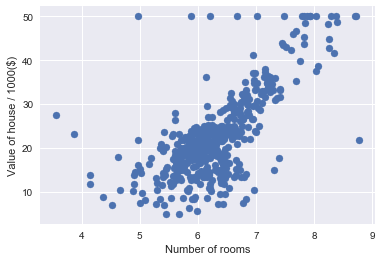

In [38]:
# plotting house value vs. number of rooms
plt.scatter(X_room, y)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house / 1000($)')
plt.show()

In [40]:
# create a linear regression model
lin_reg = LinearRegression()

In [41]:
lin_reg.fit(X_room, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
prediction_space = np.linspace(min(X_room), max(X_room)).reshape(-1,1)

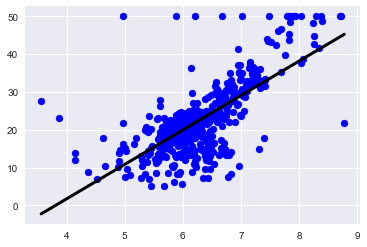

In [45]:
# plot data and prediction
plt.scatter(X_room, y, color='blue')
plt.plot(prediction_space, lin_reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

## Predicting House Value from all features using Linear Regression

In [54]:
# refersh the data
X = boston.data
y = boston.target

In [55]:
# split tha data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
reg_all = LinearRegression()

In [57]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
y_pred = reg_all.predict(X_test)

In [63]:
# compute tha accuracy of the model manually!
# sum(y_pred==y_test) / len(y_test)

In [62]:
reg_all.score(X_test, y_test)

0.7109203586326318

#### Cross Validation

In [67]:
cross_validation = cross_val_score(reg_all, X, y, cv=5)
cross_validation

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

In [68]:
np.mean(cross_validation)

0.35074135093252534

## Predicting House Value from all features using Ridge

In [70]:
X = boston.data
y = boston.target

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
ridge = Ridge(alpha=0.1, normalize=True)

In [73]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [74]:
y_pred = ridge.predict(X_test)

In [75]:
ridge.score(X_test, y_test)

0.699556502710042

## Predicting House Value from all features using Lasso

In [77]:
X = boston.data
y = boston.target

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
lasso = Lasso(alpha=0.1, normalize=True)

In [80]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
y_pred = lasso.predict(X_test)

In [83]:
lasso.score(X_test, y_test)

0.5950229292587826

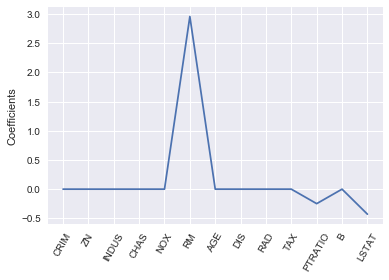

In [86]:
# plotting lasso coeficients
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(boston.feature_names)), lasso_coef)
_ = plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()